# Changes

We can see, "accuracy" and "cross-entropy" to fluctuate a lot. This is due to fixed learning rate. We need to have a adaptive learning rate for resolve this issue. 

Learning rate: In gradient descent learning rate is fixed. Details has been discussed following link. W're using "adamOptimizer" here
* Link1: https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#8
* Link2: https://smist08.wordpress.com/2016/10/04/the-road-to-tensorflow-part-10-more-on-optimization/

When using RELUs, make sure biases are initialised with small *positive* values for example 0.1 = tf.ones([K])/10
* Using Relu as activation function
* initialize Bias as non-zero
* Weights initialised with small random values between -0.2 and +0.2
 

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

In [3]:
L = 200; M = 100; N=60; O=30

W1 = tf.Variable( tf.truncated_normal( [784,L],stddev=0.1 ) )
W2 = tf.Variable( tf.truncated_normal( [L,M],stddev=0.1 ) )
W3 = tf.Variable( tf.truncated_normal( [M,N],stddev=0.1 ) )
W4 = tf.Variable( tf.truncated_normal( [N,O],stddev=0.1 ) )
W5 = tf.Variable( tf.truncated_normal( [O,10],stddev=0.1 ) )

B1 = tf.Variable(tf.ones([L])/10)
B2 = tf.Variable(tf.ones([M])/10)
B3 = tf.Variable(tf.ones([N])/10)
B4 = tf.Variable(tf.ones([O])/10)
B5 = tf.Variable(tf.ones([10])/10)

In [4]:
Y1 = tf.nn.relu(tf.matmul(x,W1)+B1)
Y2 = tf.nn.relu(tf.matmul(Y1,W2)+B2)
Y3 = tf.nn.relu(tf.matmul(Y2,W3)+B3)
Y4 = tf.nn.relu(tf.matmul(Y3,W4)+B4)
logits = tf.matmul(Y4,W5)+B5
y_pred = tf.nn.softmax(logits)

In [5]:
cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y) )
#optimizer = tf.train.GradientDescentOptimizer(0.05)
optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(cross_entropy) 

# 1# For Beginner 
We find the accuracy for testing data

# 1#A. We backpropagate for 10 times

In [ ]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))


for _ in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys}
    for _ in range(10):    
        sess.run(train_step, feed_dict=training_data)

print(sess.run(accuracy,feed_dict={x:data.test.images,y:data.test.labels}))


# 1#B. We backpropagate once

In [10]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))


for _ in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys}       
    sess.run(train_step, feed_dict=training_data)

print(sess.run(accuracy,feed_dict={x:data.test.images,y:data.test.labels}))

0.9784


# 2# Better visualization 
Here we can see the improvement of accuray and cross_entropy as we train more data 

In [7]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# train data
training_acc = []
training_ce = []
test_acc = []
test_ce = []
import numpy as np
for i in range(10000):
    batch_xs, batch_ys = data.train.next_batch(100)
    training_data = {x: batch_xs, y: batch_ys}
    sess.run(train_step, feed_dict=training_data)

    if  np.remainder([i], 100) == 0:
        acc,ce = sess.run([accuracy,cross_entropy], feed_dict=training_data)
        training_acc.append(acc)
        training_ce.append(ce)
        
        test_data = {x:data.test.images,y:data.test.labels}
        acc2,ce2 = sess.run([accuracy,cross_entropy],feed_dict=test_data)
        test_acc.append(acc2)
        test_ce.append(ce2)
    
    


In [8]:
test_data = {x:data.test.images,y:data.test.labels}
test_accuracy,test_crossentropy = sess.run([accuracy,cross_entropy],feed_dict=test_data)
print('Testing Accuracy:\t',test_accuracy)
print('Testing Cross Entropy:\t',test_crossentropy)

Testing Accuracy:	 0.9784
Testing Cross Entropy:	 0.100191


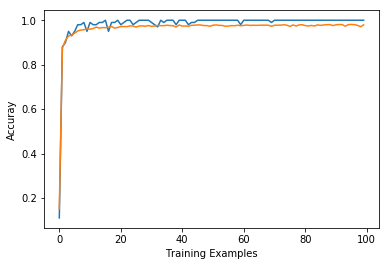

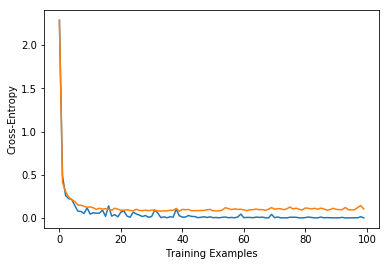

In [9]:
import matplotlib.pyplot as plt
plt.plot(training_acc)
plt.plot(test_acc)
plt.xlabel('Training Examples')
plt.ylabel('Accuray')
plt.show()

plt.plot(training_ce)
plt.plot(test_ce)
plt.xlabel('Training Examples')
plt.ylabel('Cross-Entropy')
plt.show()

